# Project - Prediction (Match Prediction)

**Importing Libraries** 

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Reading Datasets**

In [2]:
File1 = pd.read_csv("IPL_Matches.csv")
File2 = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
File3 = pd.read_csv("IPL_Team.csv")
File4 = pd.read_csv("IPL_HeadToHead.csv")

### Data Preprocessing - 1

In [3]:
# Updating the IPL_Ball_by_Ball_2008_20022 file by adding Bowling column
File2 = pd.merge(File1[['ID','Team1','Team2']], File2, on='ID', how='right')
File2['BowlingTeam'] = File2.apply(lambda row: row['Team2'] if row['BattingTeam'] == row['Team1'] else row['Team1'],axis=1)
File2.drop(['Team1', 'Team2'], axis=1, inplace=True)
File2.to_csv("IPL_Ball_By_Ball_Updated.csv",index=False) # New file with bowling column IPL_Ball_by_Ball_Updated 

In [4]:
# Filling the null values
File1['City'] = File1.apply(lambda row: 'Sharjah' if row['Venue'] == 'Sharjah Cricket Stadium' else row['City'], axis=1)
File1['City'] = File1.apply(lambda row: 'Dubai' if row['Venue'] == 'Dubai International Cricket Stadium' else row['City'], axis=1)
File1['City'].replace({'Bengaluru':'Bangalore'},inplace=True)
File1['Margin'].fillna(value=0,inplace=True)
File1.drop(['method'],axis=1,inplace=True)
File1.dropna(subset='WinningTeam',inplace=True)

In [5]:
#Giving some common names to same names
File1['Team1'] = File1['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
File1['Team1'] = File1['Team1'].str.replace('Gujarat Lions','Gujarat Titans')
File1['Team1'] = File1['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
File1['Team1'] = File1['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File1.loc[File1['Team1'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'Team1'] = 'Rising Pune Supergiants'

File1['Team2'] = File1['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
File1['Team2'] = File1['Team2'].str.replace('Gujarat Lions','Gujarat Titans')
File1['Team2'] = File1['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
File1['Team2'] = File1['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File1.loc[File1['Team2'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'Team2'] = 'Rising Pune Supergiants'

File1['TossWinner'] = File1['TossWinner'].str.replace('Delhi Daredevils','Delhi Capitals')
File1['TossWinner'] = File1['TossWinner'].str.replace('Gujarat Lions','Gujarat Titans')
File1['TossWinner'] = File1['TossWinner'].str.replace('Kings XI Punjab','Punjab Kings')
File1['TossWinner'] = File1['TossWinner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File1.loc[File1['TossWinner'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'TossWinner'] = 'Rising Pune Supergiants'

File1['WinningTeam'] = File1['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
File1['WinningTeam'] = File1['WinningTeam'].str.replace('Gujarat Lions','Gujarat Titans')
File1['WinningTeam'] = File1['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')
File1['WinningTeam'] = File1['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File1.loc[File1['WinningTeam'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'WinningTeam'] = 'Rising Pune Supergiants'

In [6]:
#Splitting the player column
File1['Team1Players'] = File1['Team1Players'].apply(lambda x: x.split(','))
File1 = File1.join(pd.DataFrame(File1['Team1Players'].to_list(), columns=['T1_P1', 'T1_P2', 'T1_P3','T1_P4','T1_P5','T1_P6','T1_P7','T1_P8','T1_P9','T1_P10','T1_P11']))

File1['Team2Players'] = File1['Team2Players'].apply(lambda x: x.split(','))
File1 = File1.join(pd.DataFrame(File1['Team2Players'].to_list(), columns=['T2_P1', 'T2_P2', 'T2_P3','T2_P4','T2_P5','T2_P6','T2_P7','T2_P8','T2_P9','T2_P10','T2_P11']))

In [7]:
File1['T1_P11'] = File1['T1_P11'].str.replace(']',"")
File1['T1_P1'] = File1['T1_P1'].str.replace('[',"")
File1['T1_P11'] = File1['T1_P11'].str.replace("'","")
File1['T1_P10'] = File1['T1_P10'].str.replace("'","")
File1['T1_P9'] = File1['T1_P9'].str.replace("'","")
File1['T1_P8'] = File1['T1_P8'].str.replace("'","")
File1['T1_P7'] = File1['T1_P7'].str.replace("'","")
File1['T1_P6'] = File1['T1_P6'].str.replace("'","")
File1['T1_P5'] = File1['T1_P5'].str.replace("'","")
File1['T1_P4'] = File1['T1_P4'].str.replace("'","")
File1['T1_P3'] = File1['T1_P3'].str.replace("'","")
File1['T1_P2'] = File1['T1_P2'].str.replace("'","")
File1['T1_P1'] = File1['T1_P1'].str.replace("'","")

File1['T2_P11'] = File1['T2_P11'].str.replace(']','')
File1['T2_P1'] = File1['T2_P1'].str.replace('[','')
File1['T2_P11'] = File1['T2_P11'].str.replace("'","")
File1['T2_P10'] = File1['T2_P10'].str.replace("'","")
File1['T2_P9'] = File1['T2_P9'].str.replace("'","")
File1['T2_P8'] = File1['T2_P8'].str.replace("'","")
File1['T2_P7'] = File1['T2_P7'].str.replace("'","")
File1['T2_P6'] = File1['T2_P6'].str.replace("'","")
File1['T2_P5'] = File1['T2_P5'].str.replace("'","")
File1['T2_P4'] = File1['T2_P4'].str.replace("'","")
File1['T2_P3'] = File1['T2_P3'].str.replace("'","")
File1['T2_P2'] = File1['T2_P2'].str.replace("'","")
File1['T2_P1'] = File1['T2_P1'].str.replace("'","")

In [8]:
# Applying similar names for MatchNumber column
File1['MatchNumber'] = File1['MatchNumber'].astype(str).apply(lambda x: 'League Match' if x.isdigit() else x)
File1['MatchNumber'] = File1['MatchNumber'].str.replace('Qualifier1','Qualifier')
File1['MatchNumber'] = File1['MatchNumber'].str.replace('Qualifier2','Qualifier')
File1['MatchNumber'] = File1['MatchNumber'].str.replace('Semi Final','Qualifier')
File1['MatchNumber'] = File1['MatchNumber'].str.replace('Elimination Final','Eliminator')

In [9]:
# Reading the updated IPL_Matches file with cleaned contents
File1 = pd.read_csv("IPL_Matches_Updated.csv")

In [10]:
# Making common names of similar teams for file2
File2['BattingTeam'] = File2['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
File2['BattingTeam'] = File2['BattingTeam'].str.replace('Gujarat Lions','Gujarat Titans')
File2['BattingTeam'] = File2['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')
File2['BattingTeam'] = File2['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File2.loc[File2['BattingTeam'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'BattingTeam'] = 'Rising Pune Supergiants'

File2['BowlingTeam'] = File2['BowlingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
File2['BowlingTeam'] = File2['BowlingTeam'].str.replace('Gujarat Lions','Gujarat Titans')
File2['BowlingTeam'] = File2['BowlingTeam'].str.replace('Kings XI Punjab','Punjab Kings')
File2['BowlingTeam'] = File2['BowlingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
File2.loc[File2['BowlingTeam'].isin(['Rising Pune Supergiant','Rising Pune Supergiants']),'BowlingTeam'] = 'Rising Pune Supergiants'

In [11]:
# Taking Limited contents from File3
File3 = File3[['TeamID', 'Team', 'City', 'Winning Percentage']].copy()

### Data Visualisation - 1

**Most Matches Played as per Venue**

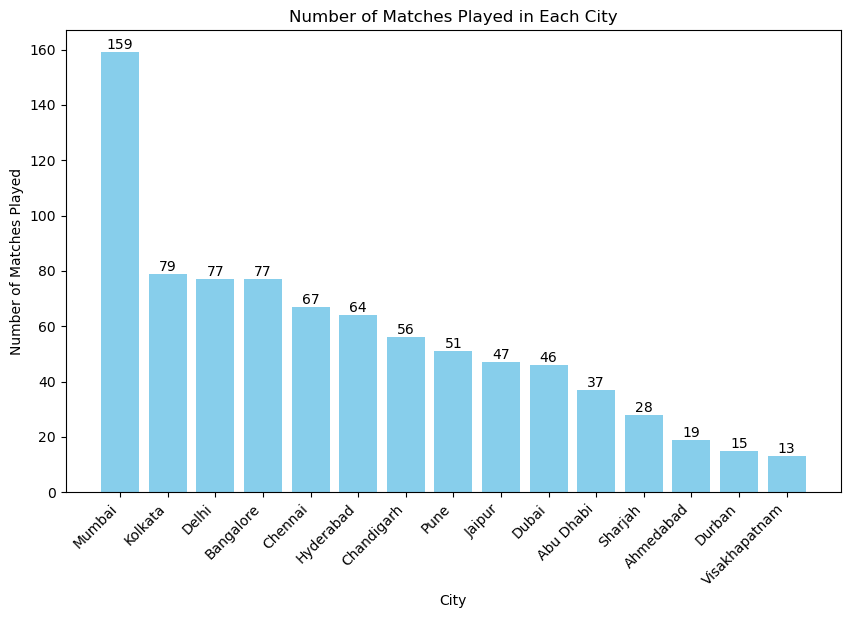

In [12]:
matches_per_city = File1['City'].value_counts().nlargest(15).reset_index()
matches_per_city.columns = ['City', 'Matches Played']

plt.figure(figsize=(10, 6))
bars = plt.bar(matches_per_city['City'], matches_per_city['Matches Played'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')
plt.show()

**Venue wise win percentagee of each team**

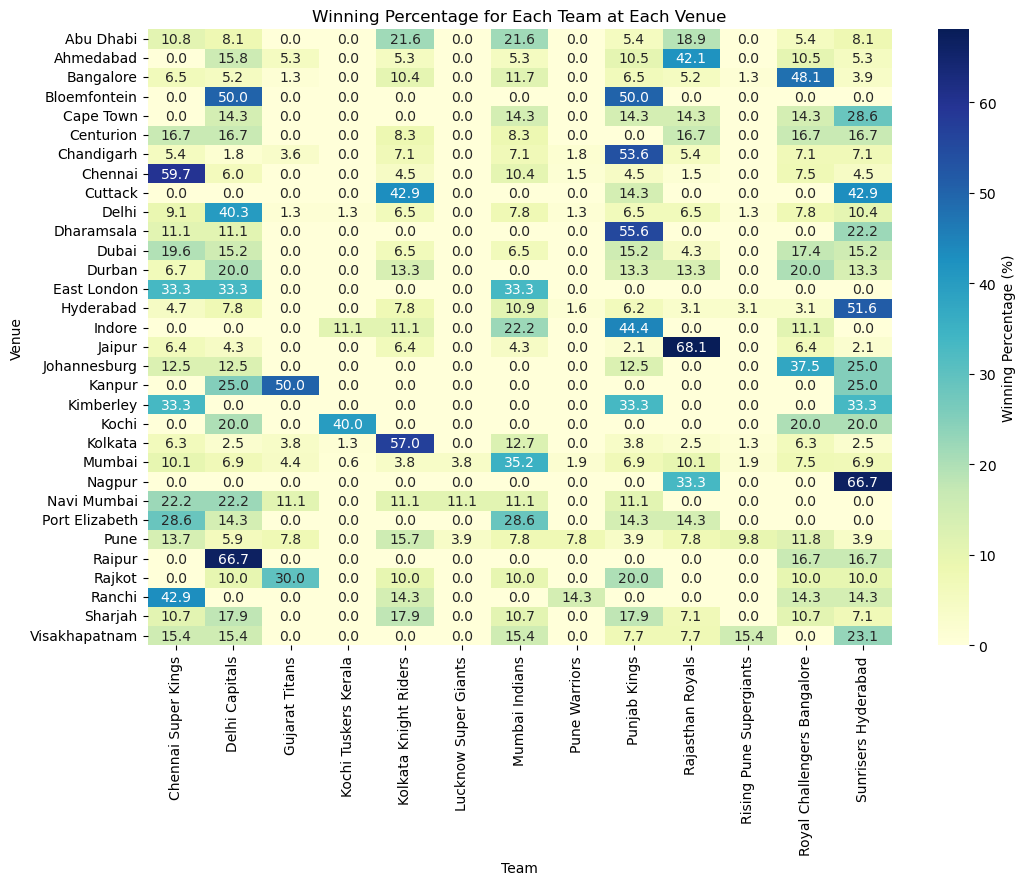

In [13]:
venue_wins = File1.groupby(['City', 'WinningTeam']).size().unstack().fillna(0)
venue_total_matches = File1['City'].value_counts()
venue_winning_percentage = (venue_wins.T / venue_total_matches).T * 100
plt.figure(figsize=(12, 8))
sns.heatmap(venue_winning_percentage, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Winning Percentage (%)'})
plt.title('Winning Percentage for Each Team at Each Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()

**Team wise Toss Winning Percentage**

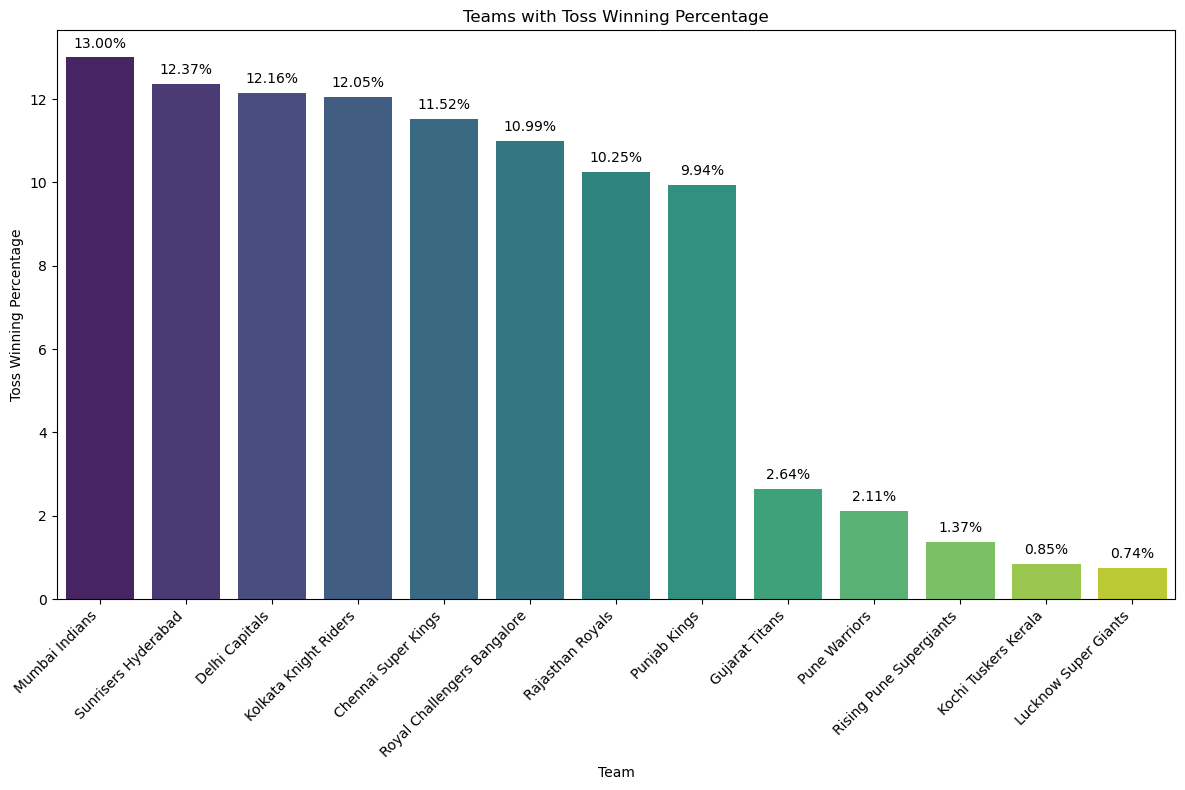

In [14]:
toss_winner_counts = File1['TossWinner'].value_counts()
total_matches = File1.shape[0]
toss_winner_percentage = (toss_winner_counts / total_matches) * 100

sorted_toss_winners = toss_winner_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_toss_winners.index, y=sorted_toss_winners.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Teams with Toss Winning Percentage')
plt.xlabel('Team')
plt.ylabel('Toss Winning Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Team wise Toss Decision Across Matches**

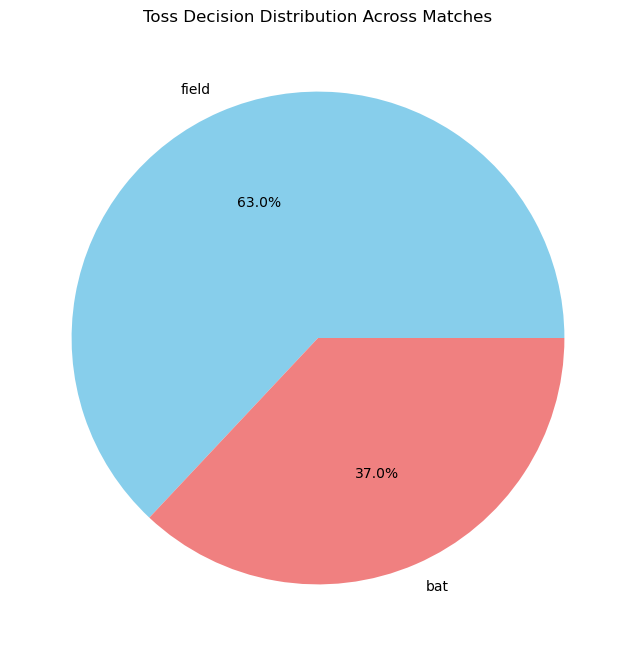

In [15]:
toss_decision_distribution = File1['TossDecision'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(toss_decision_distribution, labels=toss_decision_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Toss Decision Distribution Across Matches')
plt.show()

**Comparision of Toss Winner Wins the Match**

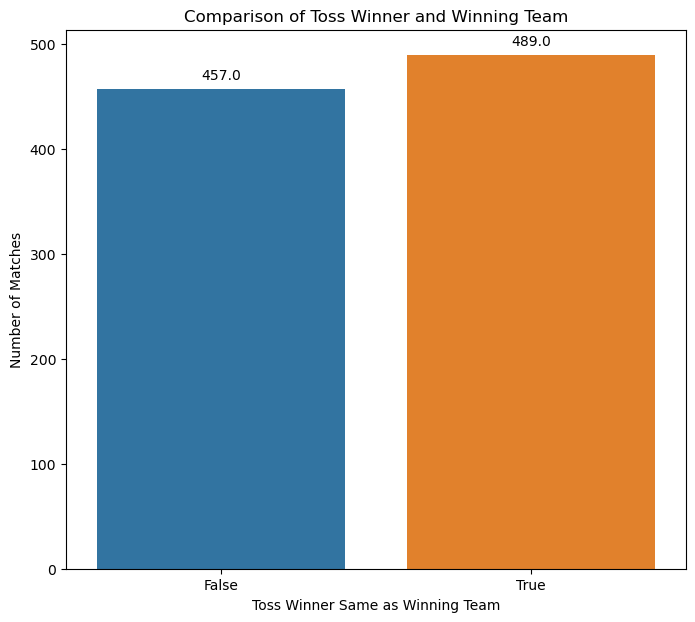

In [16]:
plt.figure(figsize=(8, 7))

winneroft = File1['TossWinner'] == File1['WinningTeam']
winneroft_counts = winneroft.value_counts()

ax = sns.countplot(x=winneroft)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Toss Winner Same as Winning Team')
plt.ylabel('Number of Matches')
plt.title('Comparison of Toss Winner and Winning Team')
plt.show()


**Analysis based on Match Type**

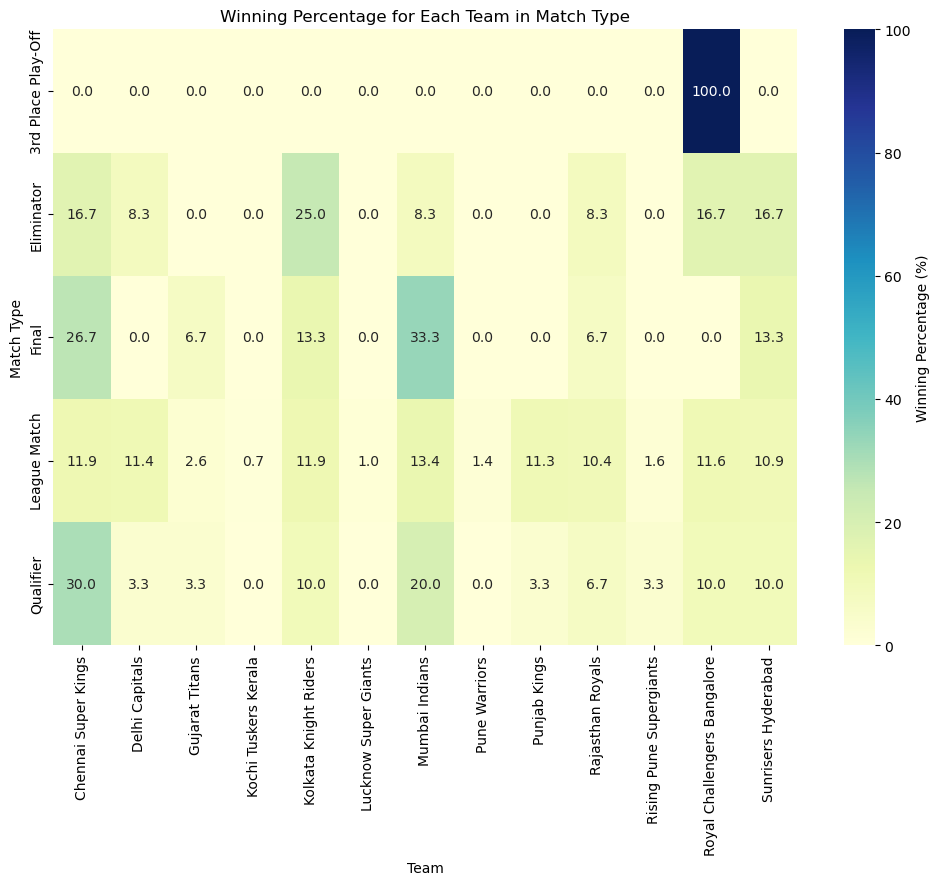

In [17]:
venue_wins = File1.groupby(['MatchNumber', 'WinningTeam']).size().unstack().fillna(0)
venue_total_matches = File1['MatchNumber'].value_counts()
venue_winning_percentage = (venue_wins.T / venue_total_matches).T * 100
plt.figure(figsize=(12, 8))
sns.heatmap(venue_winning_percentage, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Winning Percentage (%)'})
plt.title('Winning Percentage for Each Team in Match Type')
plt.xlabel('Team')
plt.ylabel('Match Type')
plt.show()

**Winning Percentage of each Team**

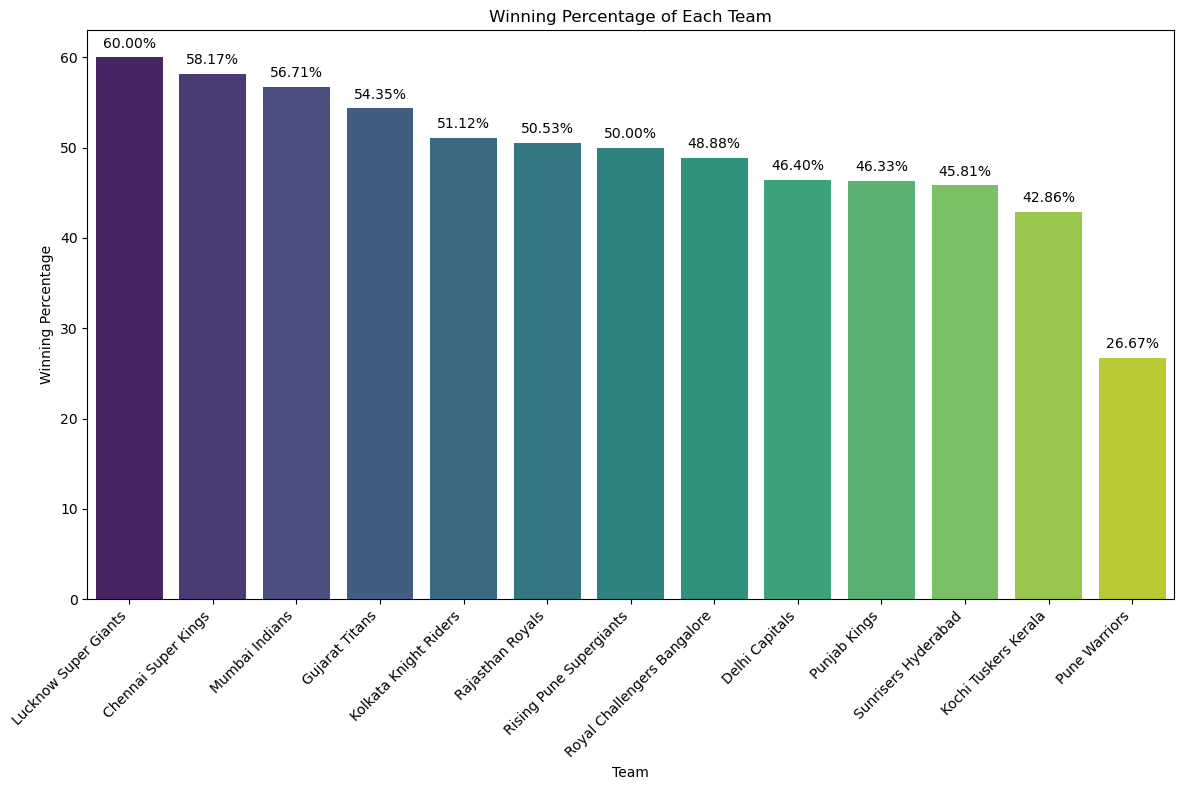

In [18]:
winning_team_counts = File1['WinningTeam'].value_counts()
matches_played = pd.concat([File1['Team1'], File1['Team2']])
total_matches = matches_played.value_counts()
winning_percentage = (winning_team_counts / total_matches) * 100
sorted_winning_percentage = winning_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_winning_percentage.index, y=sorted_winning_percentage.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Winning Percentage of Each Team')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Most Matches by Player**

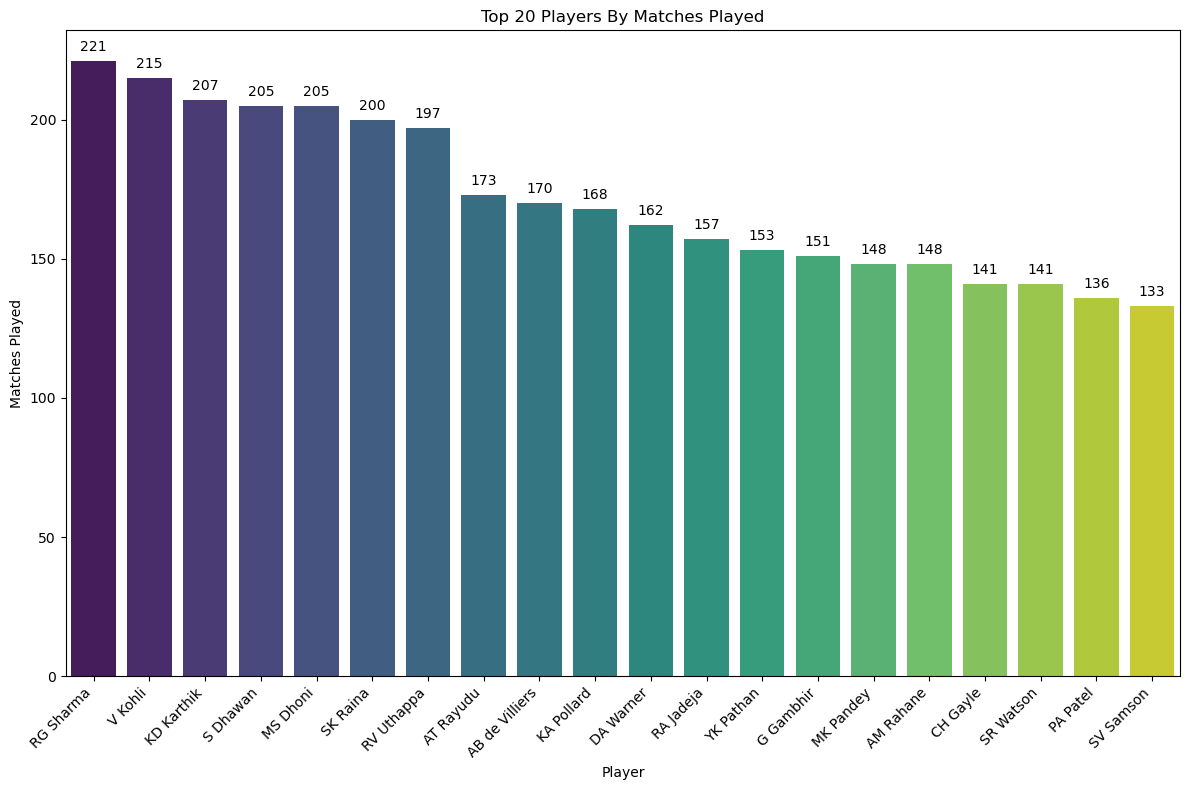

In [19]:
matches_played = File2.groupby('batter')['ID'].nunique().reset_index(name='MatchesPlayed')
matches_played_top = matches_played.sort_values(by='MatchesPlayed', ascending=False).head(20)
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=matches_played_top, x='batter', y='MatchesPlayed', palette='viridis')
plt.title('Top 20 Players By Matches Played')
plt.xlabel('Player')
plt.ylabel('Matches Played')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Most Runs by Player**

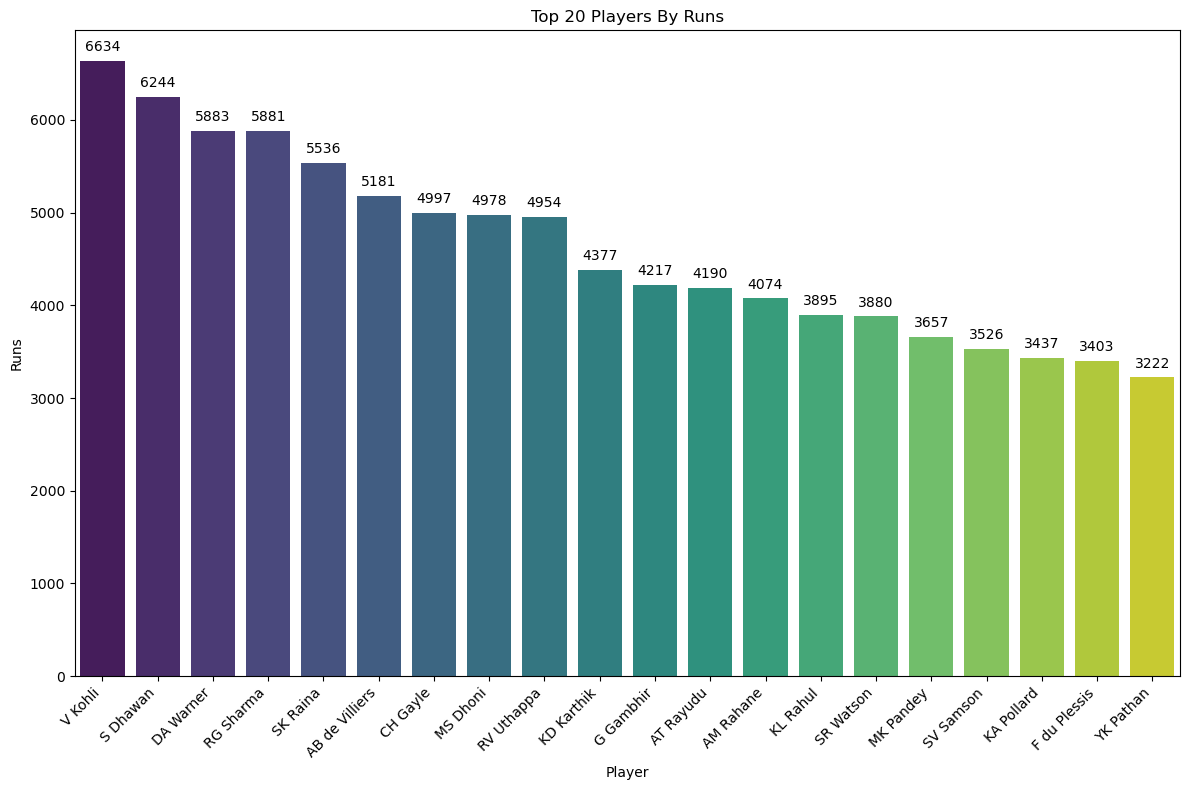

In [20]:
run_total = File2.groupby('batter').apply(lambda x: x['batsman_run'].sum()).reset_index(name='Runs')
runs_total = run_total.sort_values(by='Runs', ascending=False)
runs_total_key = runs_total[runs_total['Runs'] > 1000]
runs_total_top = runs_total_key.head(20)
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=runs_total_top, x='batter', y='Runs', palette='viridis')
plt.title('Top 20 Players By Runs')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Best Batting Average**

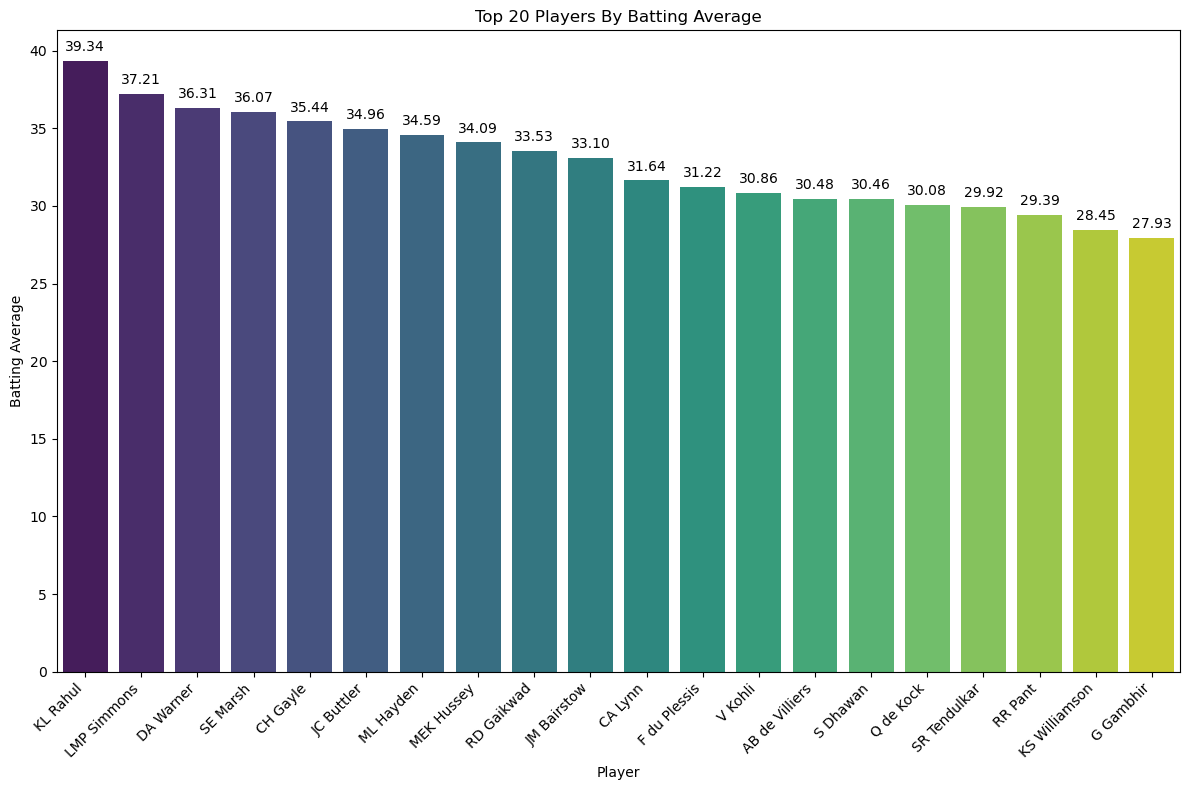

In [21]:
batting_avg = pd.merge(matches_played, runs_total, on='batter', how='inner')
batting_avg['BattingAverage'] = batting_avg['Runs'] / batting_avg['MatchesPlayed']
batting_avg.sort_values(by='BattingAverage', ascending=False, inplace=True)
batting_avg_key = batting_avg[batting_avg['Runs'] > 1000]
batting_avg_top = batting_avg_key.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=batting_avg_top, x='batter', y='BattingAverage', palette='viridis')
plt.title('Top 20 Players By Batting Average')
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Best Batting Strike Rate**

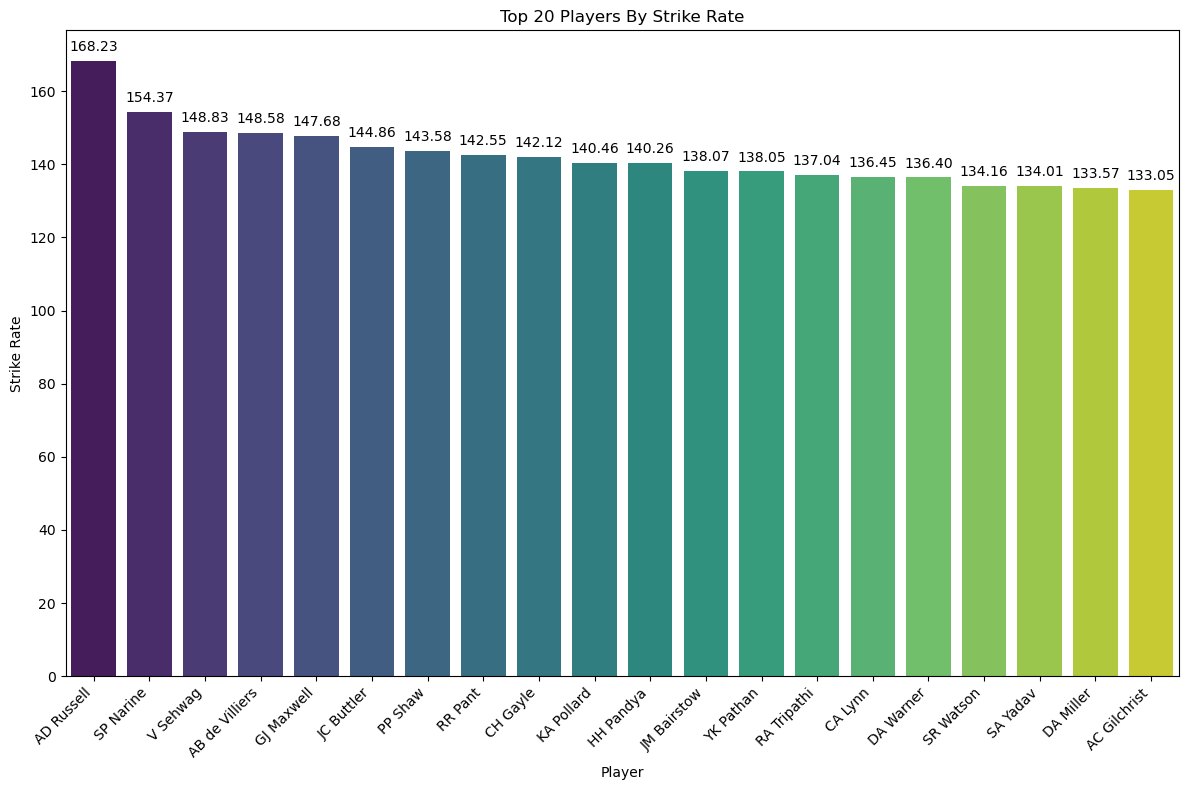

In [22]:
total_runs = File2.groupby('batter')['batsman_run'].sum().reset_index(name='Runs')
balls_faced = File2.groupby('batter')['ballnumber'].count().reset_index(name='Balls')
batsman_runs_balls = pd.merge(total_runs, balls_faced, on='batter', how='outer')
batsman_runs_balls['StrikeRate'] = (batsman_runs_balls['Runs'] / batsman_runs_balls['Balls']) * 100
strike_rate = batsman_runs_balls.sort_values(by='StrikeRate', ascending=False)
strike_rate_key = strike_rate[strike_rate['Runs'] > 1000]
strike_rate_top = strike_rate_key.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=strike_rate_top, x='batter', y='StrikeRate', palette='viridis')
plt.title('Top 20 Players By Strike Rate')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Making a complete batting matrix**

In [23]:
strike_rate_key.drop(['Runs'],axis=1,inplace=True)
batting_perfo = pd.merge(batting_avg_key,strike_rate_key,on='batter',how='inner')
batting_perfo.drop(['MatchesPlayed'],axis=1,inplace=True)
batting_perfo

C:\Users\Shyam Mashru\AppData\Local\Temp\ipykernel_23280\1907734674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strike_rate_key.drop(['Runs'],axis=1,inplace=True)


,batter,Runs,BattingAverage,Balls,StrikeRate
0,KL Rahul,3895,39.343434,2933,132.799182
1,LMP Simmons,1079,37.206897,878,122.892938
2,DA Warner,5883,36.314815,4313,136.401577
3,SE Marsh,2489,36.072464,1913,130.109775
4,CH Gayle,4997,35.439716,3516,142.121729
...,...,...,...,...,...
78,KM Jadhav,1196,14.950000,1002,119.361277
79,DJ Bravo,1560,14.181818,1247,125.100241
80,IK Pathan,1150,14.024390,985,116.751269
81,AR Patel,1135,13.045977,919,123.503808


In [24]:
# Calculating Runs Conceded
runs=File2.groupby('bowler').apply(lambda x:np.sum(x['total_run'])).reset_index(name='Runs Conceded')

**Most Wickets by Player**

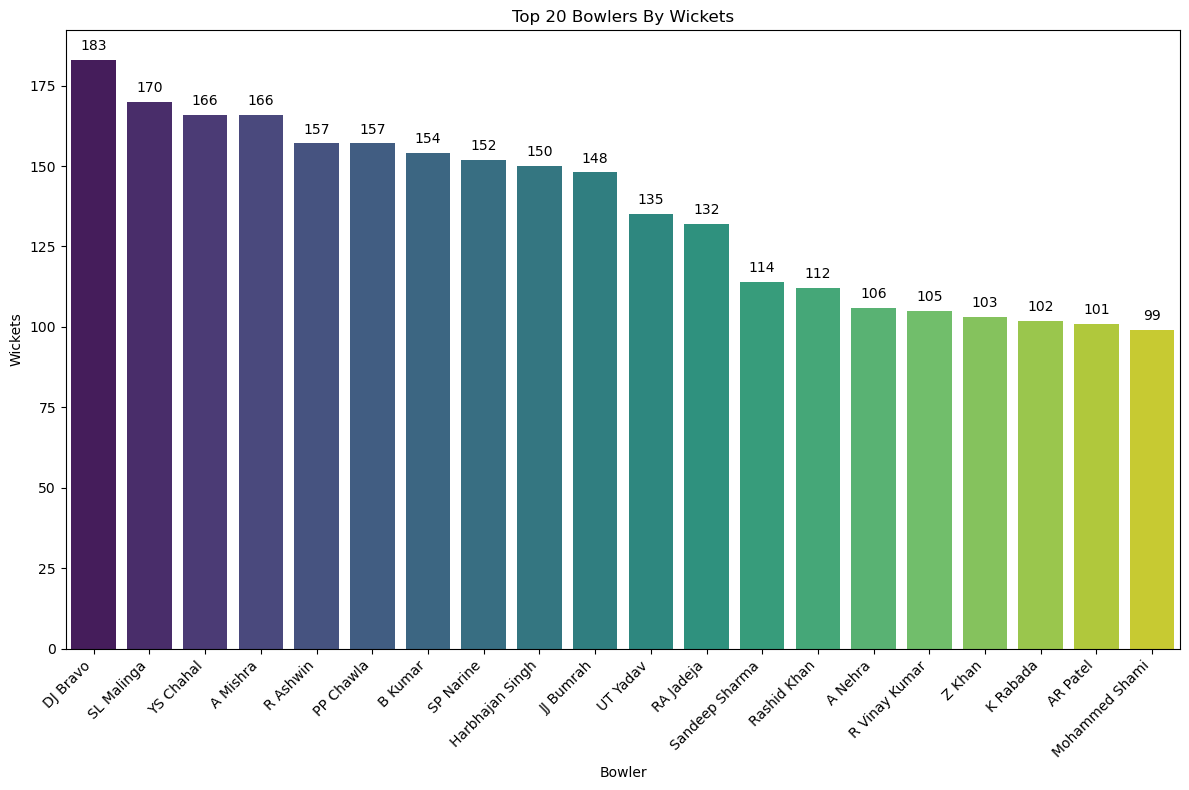

In [25]:
wicket_total = File2[File2['kind']!='run out']
wicket_totals = wicket_total.groupby('bowler').apply(lambda x:x['kind'].dropna()).reset_index(name='Wickets')
wickets_tot = wicket_totals.groupby('bowler').count().reset_index()
wickets_total = wickets_tot.sort_values(by='Wickets',ascending=False) 
wickets_total_key = wickets_total[wickets_total['Wickets']>10]
wickets_total_top = wickets_total_key.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=wickets_total_top, x='bowler', y='Wickets', palette='viridis')
plt.title('Top 20 Bowlers By Wickets')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Best Bowling Average**

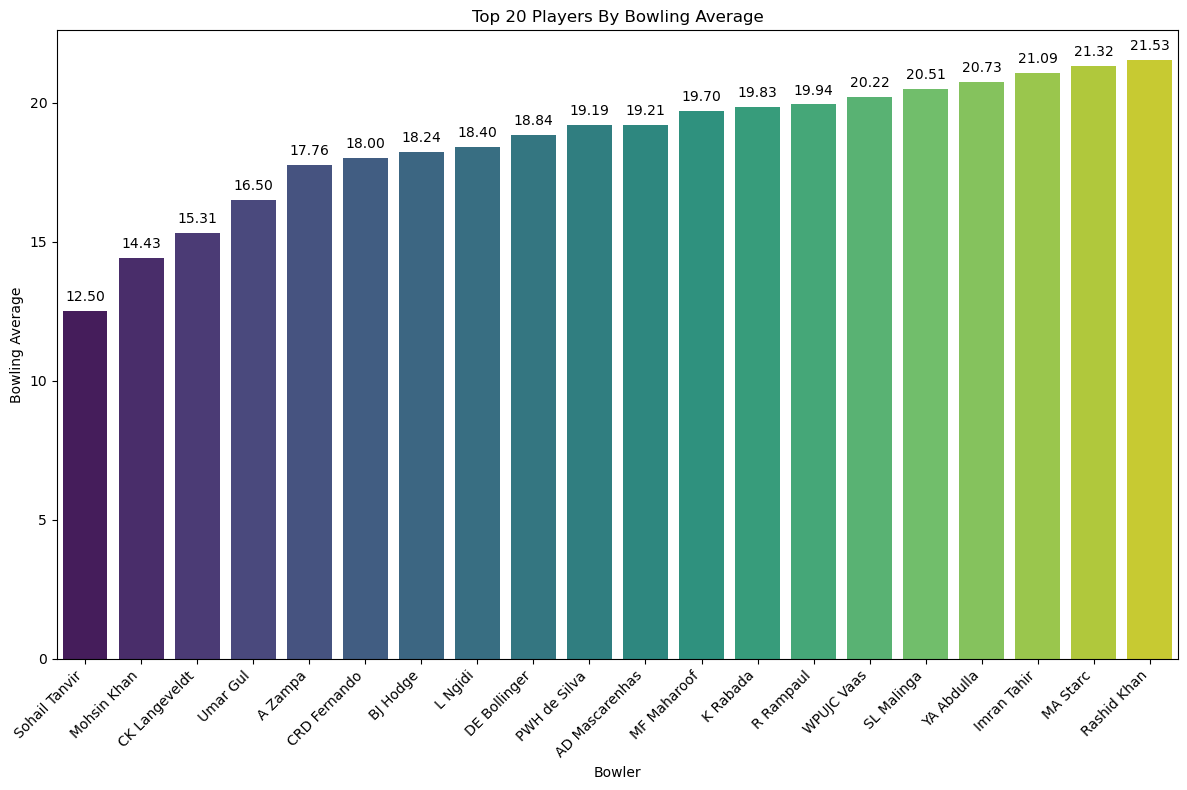

In [26]:
bowling_avg = pd.merge(runs, wickets_total, on='bowler', how='outer')
bowling_avg.fillna(value=0, inplace=True)
bowling_avg['BowlingAverage'] = bowling_avg['Runs Conceded'] / bowling_avg['Wickets']
bowling_avg['BowlingAverage'] = bowling_avg['BowlingAverage'].replace(np.inf, 0)
bowling_avg_sort = bowling_avg.sort_values(by='BowlingAverage', ascending=True)
bowling_avg_key = bowling_avg_sort[bowling_avg_sort['Wickets'] > 10]
bowling_avg_total = bowling_avg_key.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=bowling_avg_total, x='bowler', y='BowlingAverage', palette='viridis')
plt.title('Top 20 Players By Bowling Average')
plt.xlabel('Bowler')
plt.ylabel('Bowling Average')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Best Bowling Economy**

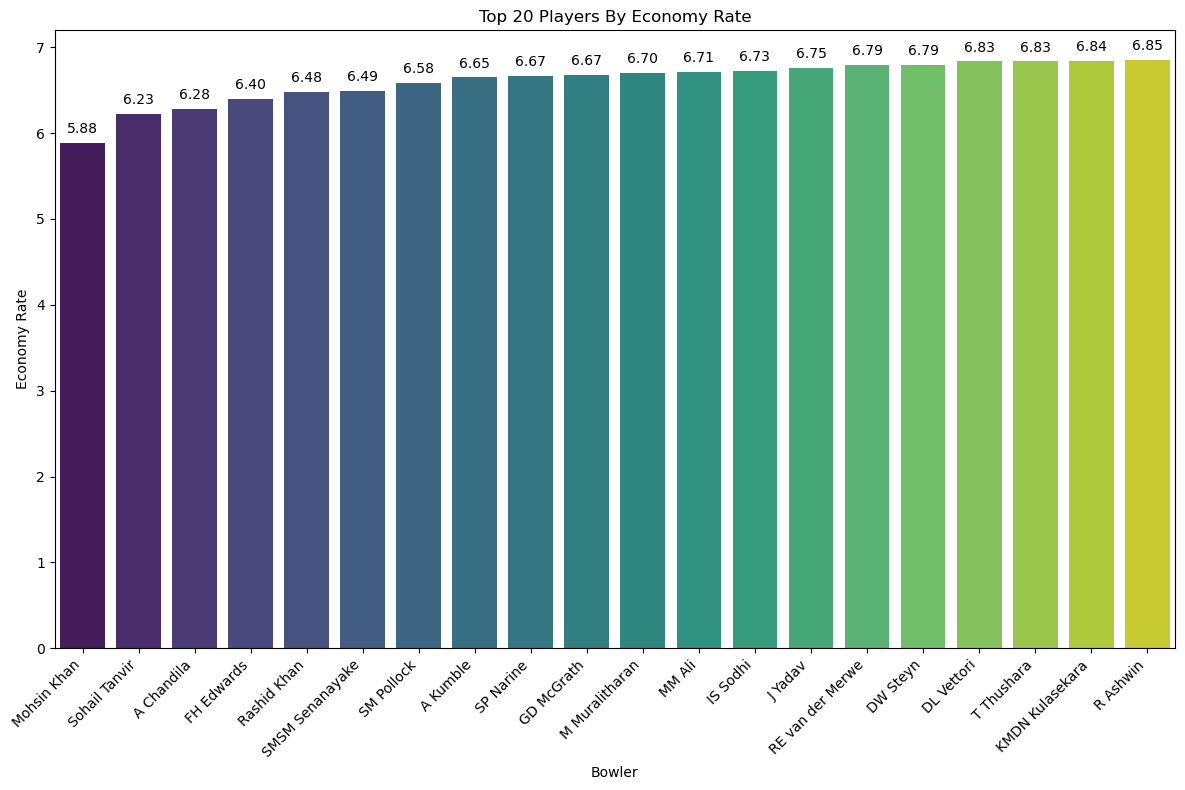

In [27]:
runs=File2.groupby('bowler').apply(lambda x:np.sum(x['total_run'])).reset_index(name='Runs Conceded')
balls=File2.groupby('bowler').count()
bowled_balls=balls['ballnumber'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
economy_rates=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
economy_rate=economy_rates.sort_values(by='Economy Rate',ascending=True)
economy_rate_key = economy_rate[economy_rate['Balls Bowled']>100]

economy_rate_total = economy_rate_key.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=economy_rate_total, x='bowler', y='Economy Rate', palette='viridis')
plt.title('Top 20 Players By Economy Rate')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

**Bowling Matrix**

In [28]:
bowling_perfo = pd.merge(bowling_avg_key,economy_rate_key,on='bowler',how='outer')
bowling_perfo.fillna(value=0)
bowling_perfo.drop(['level_1','Balls Bowled','level_2'],axis=1,inplace=True)
bowling_perfo

,bowler,Runs Conceded,Wickets,BowlingAverage,Economy Rate
0,Sohail Tanvir,275.0,22.0,12.500000,6.226415
1,Mohsin Khan,202.0,14.0,14.428571,5.883495
2,CK Langeveldt,199.0,13.0,15.307692,7.236364
3,Umar Gul,198.0,12.0,16.500000,7.764706
4,A Zampa,373.0,21.0,17.761905,7.664384
...,...,...,...,...,...
300,R Parag,NaN,NaN,NaN,10.370370
301,Akash Deep,NaN,NaN,NaN,10.386555
302,KJ Abbott,NaN,NaN,NaN,10.705882
303,S Narwal,NaN,NaN,NaN,10.778761


In [29]:
# Player performance matrix complete
player_perfo = pd.merge(batting_perfo,bowling_perfo,left_on='batter',right_on='bowler',how='outer')
player_perfo['batter'].fillna(player_perfo['bowler'], inplace=True)
player_perfo.fillna(value=0,inplace=True)
player_perfo.drop(['bowler'],axis=1,inplace=True)
player_perfo.rename({'batter':'Player'},axis=1,inplace=True)
player_perfo

,Player,Runs,BattingAverage,Balls,StrikeRate,Runs Conceded,Wickets,BowlingAverage,Economy Rate
0,KL Rahul,3895.0,39.343434,2933.0,132.799182,0.0,0.0,0.000000,0.000000
1,LMP Simmons,1079.0,37.206897,878.0,122.892938,0.0,0.0,0.000000,0.000000
2,DA Warner,5883.0,36.314815,4313.0,136.401577,0.0,0.0,0.000000,0.000000
3,SE Marsh,2489.0,36.072464,1913.0,130.109775,0.0,0.0,0.000000,0.000000
4,CH Gayle,4997.0,35.439716,3516.0,142.121729,755.0,18.0,41.944444,7.756849
...,...,...,...,...,...,...,...,...,...
354,R Parag,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.370370
355,Akash Deep,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.386555
356,KJ Abbott,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.705882
357,S Narwal,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.778761


In [30]:
# Creating a Player type column to classify the players
def classify_players(row):
    if row['BattingAverage'] > 20 and 0<row['BowlingAverage']<30:
            return 'Allrounder'
    elif row['StrikeRate']>135:
            return 'Finisher'
    elif row['BattingAverage']>30:
            return 'MainBatsman'
    elif 30>row['BattingAverage'] > 20:
        return 'Batsman'
    elif 0<row['BowlingAverage']<20:
        return 'MainBowler'
    elif 20<=row['BowlingAverage'] <30:
        return 'Bowler'
    else:
        return 'Player'
player_perfo['PlayerType'] = player_perfo.apply(classify_players, axis=1)
player_perfo

,Player,Runs,BattingAverage,Balls,StrikeRate,Runs Conceded,Wickets,BowlingAverage,Economy Rate,PlayerType
0,KL Rahul,3895.0,39.343434,2933.0,132.799182,0.0,0.0,0.000000,0.000000,MainBatsman
1,LMP Simmons,1079.0,37.206897,878.0,122.892938,0.0,0.0,0.000000,0.000000,MainBatsman
2,DA Warner,5883.0,36.314815,4313.0,136.401577,0.0,0.0,0.000000,0.000000,Finisher
3,SE Marsh,2489.0,36.072464,1913.0,130.109775,0.0,0.0,0.000000,0.000000,MainBatsman
4,CH Gayle,4997.0,35.439716,3516.0,142.121729,755.0,18.0,41.944444,7.756849,Finisher
...,...,...,...,...,...,...,...,...,...,...
354,R Parag,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.370370,Player
355,Akash Deep,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.386555,Player
356,KJ Abbott,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.705882,Player
357,S Narwal,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.778761,Player


In [31]:
# Creating a CSV file with complete player statistics
player_perfo.to_csv("IPL_PlayerPerformance.csv",index=False)

In [32]:
# Creating a CSV file with complete team statistics
File3.rename(columns={'City': 'HomeGround','Winning Percentage': 'WinningPercentage'}, inplace=True)

File3.loc[File3['HomeGround'].isin(['Chennai, Tamil Nadu']),'HomeGround'] = 'Chennai'
File3.loc[File3['HomeGround'].isin(['New Delhi, Delhi']),'HomeGround'] = 'Delhi'
File3.loc[File3['HomeGround'].isin(['Ahmedabad, Gujarat']),'HomeGround'] = 'Ahmedabad'
File3.loc[File3['HomeGround'].isin(['Kolkata, West Bengal']),'HomeGround'] = 'Kolkata'
File3.loc[File3['HomeGround'].isin(['Lucknow, Uttar Pradesh']),'HomeGround'] = 'Lucknow'
File3.loc[File3['HomeGround'].isin(['Mumbai, Maharashtra']),'HomeGround'] = 'Mumbai'
File3.loc[File3['HomeGround'].isin(['Mohali, Punjab']),'HomeGround'] = 'Punjab'
File3.loc[File3['HomeGround'].isin(['Jaipur, Rajasthan']),'HomeGround'] = 'Jaipur'
File3.loc[File3['HomeGround'].isin(['Bangalore, Karnataka']),'HomeGround'] = 'Bangalore'
File3.loc[File3['HomeGround'].isin(['Hyderabad, Telangana']),'HomeGround'] = 'Hyderabad'
File3.loc[File3['HomeGround'].isin(['Indore, Madhya Pradesh']),'HomeGround'] = 'Indore'
File3.loc[File3['HomeGround'].isin(['Pune, Maharashtra']),'HomeGround'] = 'Pune'

File3.to_csv("IPL_TeamPerformance.csv",index=False)

**Player Performance Dataset**

In [33]:
# Reading the newly created plyer performance file
File5 = pd.read_csv("IPL_PlayerPerformance.csv")

### Data Preprocessing - 2

In [34]:
T1_P_columns = [f'T1_P{i}' for i in range(1, 12)]
T2_P_columns = [f'T2_P{i}' for i in range(1, 12)]

In [35]:
for player_column in T1_P_columns:
    File1 = pd.merge(File1, File5[['Player','BattingAverage','BowlingAverage','StrikeRate','Economy Rate']], left_on=player_column, right_on='Player', how='left')
    File1.drop(['Player', player_column], axis=1, inplace=True)
    File1.rename(
        {
            'BattingAverage': f'{player_column}BattingAverage',
            'BowlingAverage': f'{player_column}BowlingAverage',
            'StrikeRate': f'{player_column}StrikeRate',
            'Economy Rate': f'{player_column}EconomyRate',
        },
        axis=1,
        inplace=True
    )

In [36]:
for player_column in T2_P_columns:
    File1 = pd.merge(File1, File5[['Player','BattingAverage','BowlingAverage','StrikeRate','Economy Rate']], left_on=player_column, right_on='Player', how='left')
    File1.drop(['Player', player_column], axis=1, inplace=True)
    File1.rename(
        {
            'BattingAverage': f'{player_column}BattingAverage',
            'BowlingAverage': f'{player_column}BowlingAverage',
            'StrikeRate': f'{player_column}StrikeRate',
            'Economy Rate': f'{player_column}EconomyRate',
        },
        axis=1,
        inplace=True
    )

In [37]:
File1.fillna(value=0,inplace=True)

In [38]:
# Calculating Team1 Batting Average
count = 0
batting_average_sum = 0
for index, row in File1.iterrows():
    player_averages = [row[f'{player_column}BattingAverage'] for player_column in T1_P_columns]
    valid_averages = [avg for avg in player_averages if avg > 0]
    File1.at[index, 'Team1BattingAverage'] = sum(valid_averages) / len(valid_averages) if len(valid_averages) > 0 else 0

In [39]:
# Calculating Team2 Batting Average
count = 0
batting_average_sum = 0
for index, row in File1.iterrows():
    player_averages = [row[f'{player_column}BattingAverage'] for player_column in T2_P_columns]
    valid_averages = [avg for avg in player_averages if avg > 0]
    File1.at[index, 'Team2BattingAverage'] = sum(valid_averages) / len(valid_averages) if len(valid_averages) > 0 else 0

In [40]:
# Calculating Team1 Bowling Average
count = 0
bowling_average_sum = 0

for index, row in File1.iterrows():
    player_averages = [row[f'{player_column}BowlingAverage'] for player_column in T1_P_columns]
    valid_averages = [avg for avg in player_averages if avg > 0]
    File1.at[index, 'Team1BowlingAverage'] = sum(valid_averages) / len(valid_averages) if len(valid_averages) > 0 else 0

In [41]:
# Calculating Team2 Bowling Average
count = 0
bowling_average_sum = 0

for index, row in File1.iterrows():
    player_averages = [row[f'{player_column}BowlingAverage'] for player_column in T2_P_columns]
    valid_averages = [avg for avg in player_averages if avg > 0]
    File1.at[index, 'Team2BowlingAverage'] = sum(valid_averages) / len(valid_averages) if len(valid_averages) > 0 else 0

In [42]:
# Calculating Team1 Batting Strike Rate
count = 0
strike_rate_sum = 0

for index, row in File1.iterrows():
    player_strikerate = [row[f'{player_column}StrikeRate'] for player_column in T1_P_columns]    
    valid_strikerate = [sr for sr in player_strikerate if sr > 0]
    File1.at[index, 'Team1StrikeRate'] = sum(valid_strikerate) / len(valid_strikerate) if len(valid_strikerate) > 0 else 0

In [43]:
# Calculating Team2 Batting Strike Rate
count = 0
strike_rate_sum = 0

for index, row in File1.iterrows():
    player_strikerate = [row[f'{player_column}StrikeRate'] for player_column in T2_P_columns]
    valid_strikerate = [sr for sr in player_strikerate if sr > 0]
    File1.at[index, 'Team2StrikeRate'] = sum(valid_strikerate) / len(valid_strikerate) if len(valid_strikerate) > 0 else 0

In [44]:
# Calculating Team1 Economy Rate
count = 0
economy_rate_sum = 0

for index, row in File1.iterrows():
    player_economyrate = [row[f'{player_column}EconomyRate'] for player_column in T1_P_columns]
    valid_economyrate = [er for er in player_economyrate if er > 0]
    File1.at[index, 'Team1EconomyRate'] = sum(valid_economyrate) / len(valid_economyrate) if len(valid_economyrate) > 0 else 0

In [45]:
# Calculating Team2 Economy Rate
count = 0
economy_rate_sum = 0

for index, row in File1.iterrows():
    player_economyrate = [row[f'{player_column}EconomyRate'] for player_column in T2_P_columns]
    valid_economyrate = [er for er in player_economyrate if er > 0]
    File1.at[index, 'Team2EconomyRate'] = sum(valid_economyrate) / len(valid_economyrate) if len(valid_economyrate) > 0 else 0

In [46]:
# Taking only required columns
File1 = File1[['ID','Team1','Team2','Season','Date','City','MatchNumber','TossWinner','TossDecision','WinningTeam','Team1BattingAverage','Team2BattingAverage','Team1BowlingAverage','Team2BowlingAverage','Team1StrikeRate','Team2StrikeRate','Team1EconomyRate','Team2EconomyRate']].copy()

In [47]:
# Making Batting First Column
def battingfirst(row):
        if row['Team1'] == row['TossWinner']:
            if row['TossDecision'] == 'bat':
                return "Team1"
            else:
                return "Team2"
        elif row['Team2'] == row['TossWinner']:
            if row['TossDecision'] == 'bat':
                return "Team2"
            else:
                return "Team1"

In [48]:
# Making Bowling First Column
def bowlingfirst(row):
        if row['Team1'] == row['TossWinner']:
            if row['TossDecision'] == 'bat':
                return "Team2"
            else:
                return "Team1"
        elif row['Team2'] == row['TossWinner']:
            if row['TossDecision'] == 'bat':
                return "Team1"
            else:
                return "Team2"

In [49]:
# Making Toss Winner Column
def tosswinner(row):
        if row['Team1'] == row['TossWinner']:
            return "Team1"
        else:
            return "Team2"

In [50]:
def result(row):
    return "Team1" if row['Team1'] == row['WinningTeam'] else "Team2"

In [51]:
File1['BattingFirst'] = File1.apply(battingfirst,axis=1)
File1['BowlingFirst'] = File1.apply(bowlingfirst,axis=1)
File1['TossWinnner'] = File1.apply(tosswinner,axis=1)
File1['Result'] = File1.apply(result,axis=1)

**Team Performance Dataset**

In [52]:
# Reading newly created Team Performance file
File6 = pd.read_csv("IPL_TeamPerformance.csv")

In [53]:
# Adding Homeground of Team1 or Team2 or Neutral
File1 = pd.merge(File1,File6[['Team','HomeGround','WinningPercentage']],left_on='Team1',right_on='Team',how='left')
File1.drop(['Team'],axis=1,inplace=True)
File1 = pd.merge(File1,File6[['Team','HomeGround','WinningPercentage']],left_on='Team2',right_on='Team',how='left')
File1.drop(['Team'],axis=1,inplace=True)

In [54]:
def HomeGround(row):
    if row['City'] == row['HomeGround_x']:
        return "Team1"
    elif row['City'] == row['HomeGround_y']:
        return "Team2"
    else:
        return "Neutral"

In [55]:
File1['HomeGround'] = File1.apply(HomeGround,axis=1)
File1.drop(['HomeGround_x','HomeGround_y'],axis=1,inplace=True)

In [56]:
# Creating Head to Head stats
File1 = pd.merge(File1,File4, left_on=['Team1', 'Team2'], right_on=['Team1', 'Team2'])

def head_to_head(row):
    if row['Matches']!=0:
        row['Team1WinPercent'] = row['Team1Wins']/row['Matches']
        row['Team2WinPercent'] = row['Team2Wins']/row['Matches']
    else:
        row['Team1WinPercent'] = 0
        row['Team2WinPercent'] = 0
    return row

File1 = File1.apply(head_to_head, axis=1)

### Data Visualisation - 2

**Batting Team Wins Matches as per City**

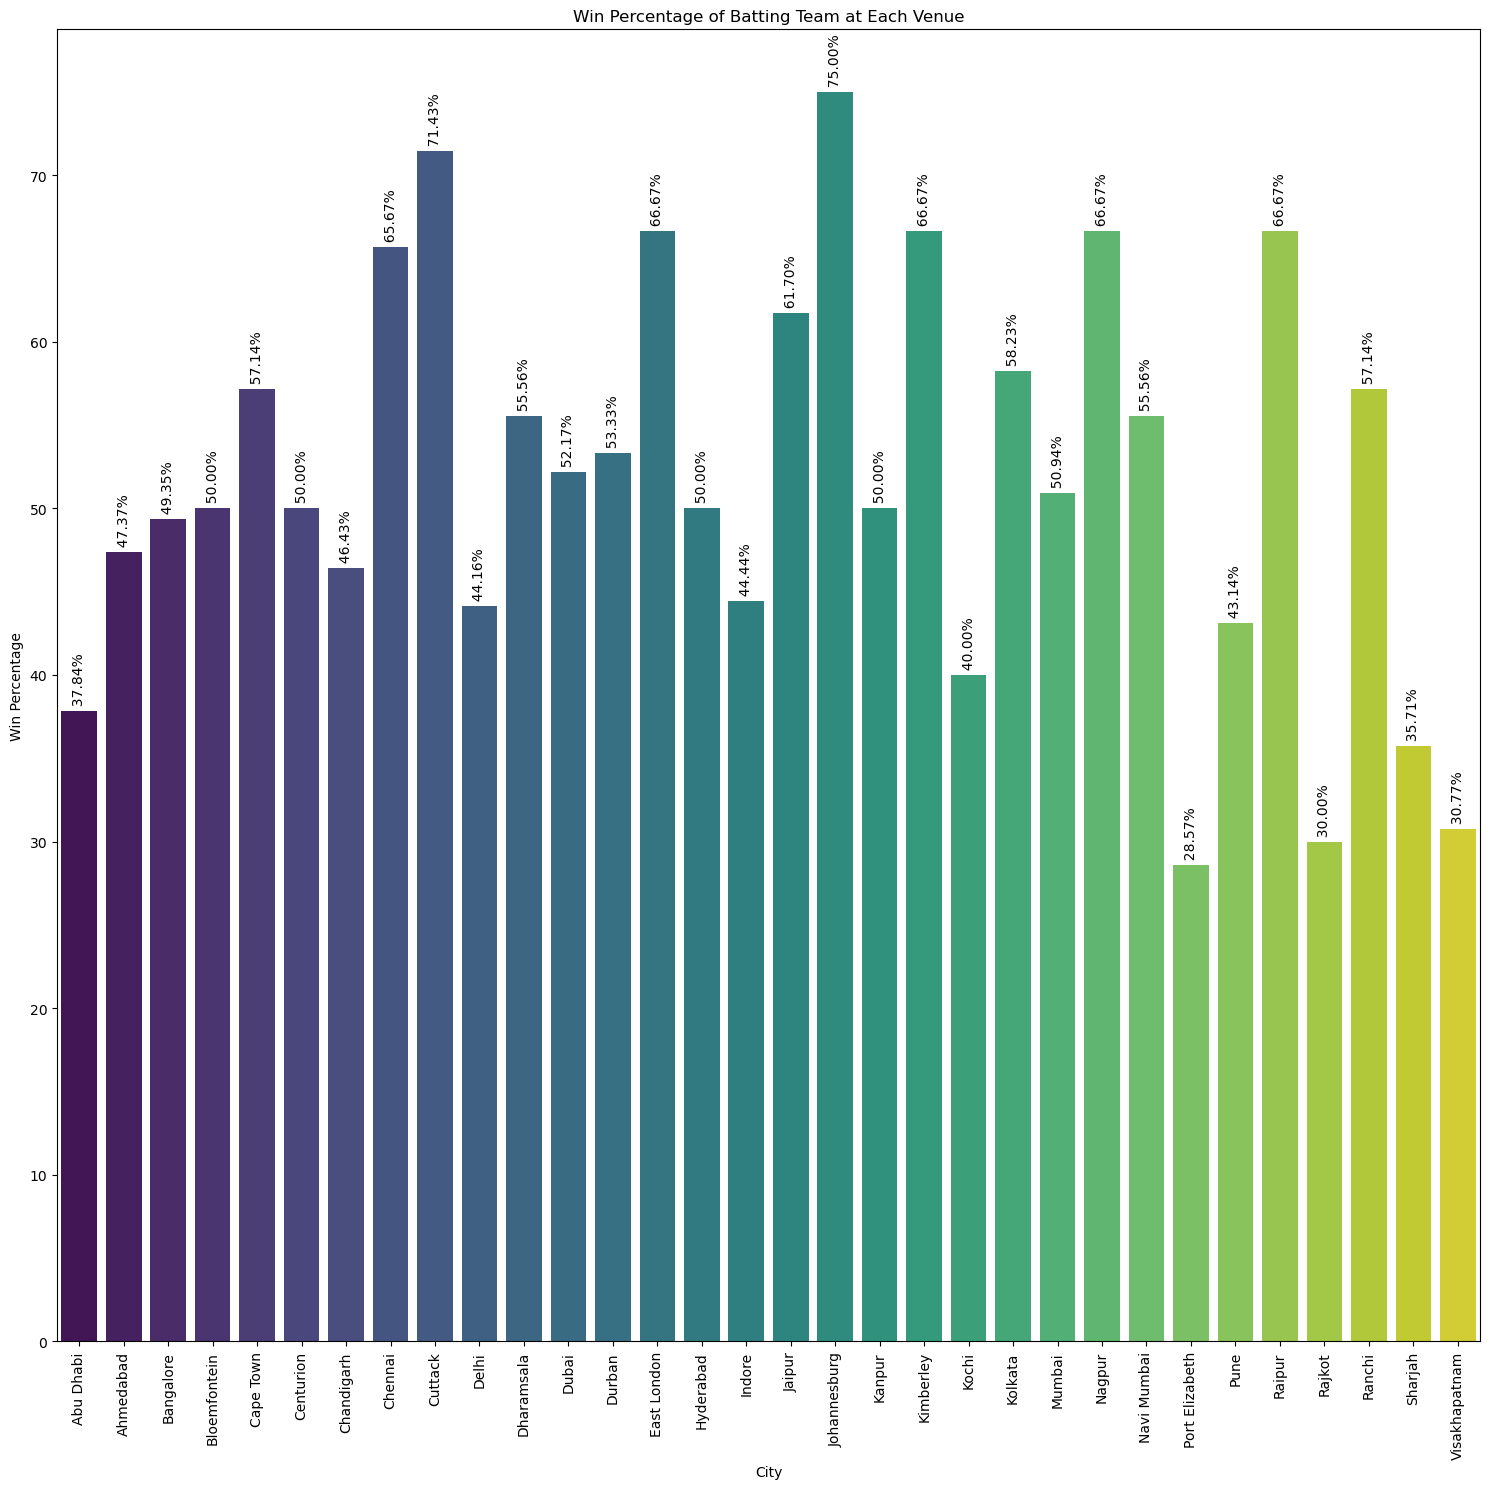

In [57]:
venue_wins = File1[File1['WinningTeam'] == File1['Team1']].groupby('City').size().reset_index(name='BattingTeamWins')
total_matches_per_venue = File1.groupby('City').size().reset_index(name='TotalMatches')
venue_wins = venue_wins.merge(total_matches_per_venue, on='City')
venue_wins['WinPercentage'] = (venue_wins['BattingTeamWins'] / venue_wins['TotalMatches']) * 100

plt.figure(figsize=(15, 15))
barplot = sns.barplot(data=venue_wins, x='City', y='WinPercentage', palette='viridis')
plt.title('Win Percentage of Batting Team at Each Venue')
plt.xlabel('City')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()

for index, row in venue_wins.iterrows():
    barplot.text(row.name, row.WinPercentage, f"  {row.WinPercentage:.2f}%", color='black', ha="center", rotation=90)
plt.show()


**Bowling Team Wins Matches as per City**

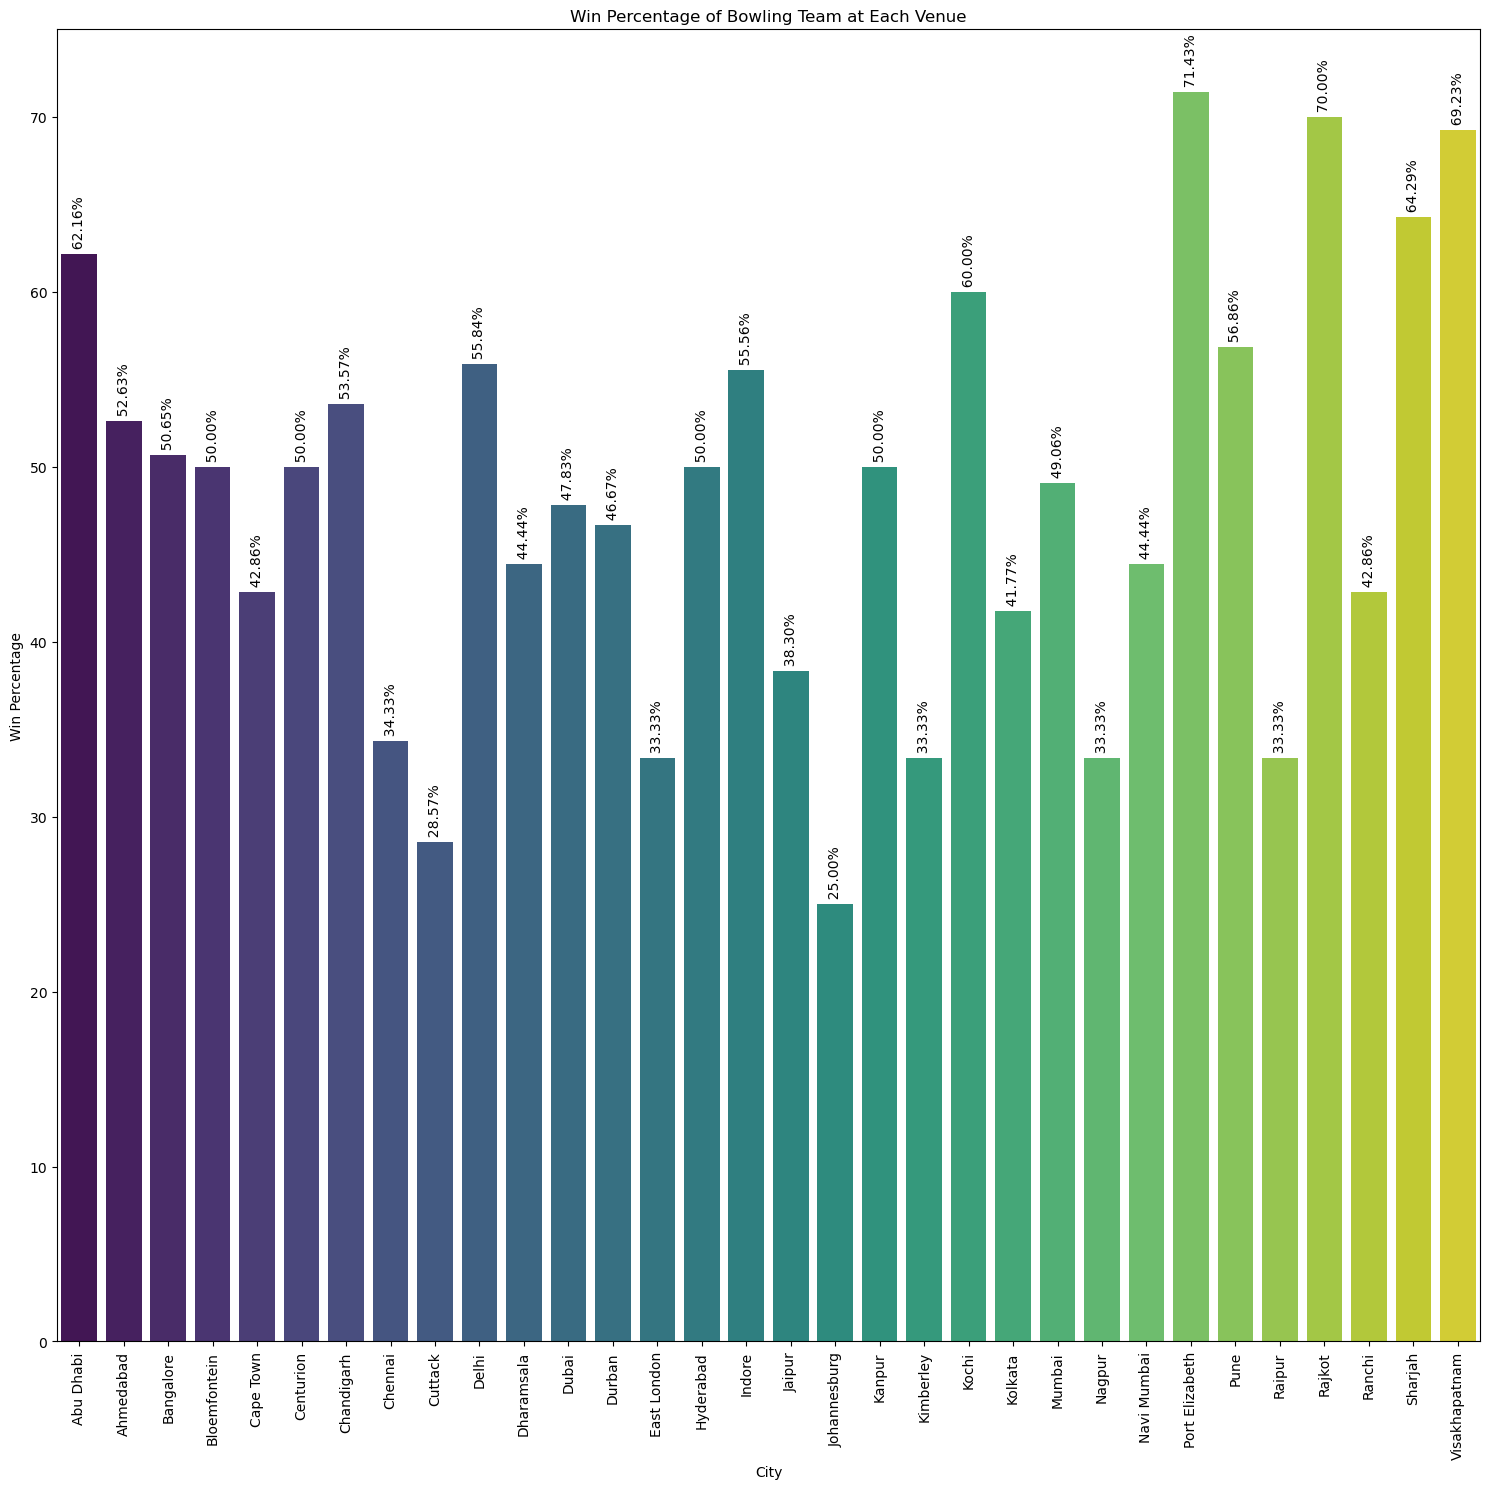

In [58]:
venue_wins_bowling = File1[File1['WinningTeam'] != File1['Team1']].groupby('City').size().reset_index(name='BowlingTeamWins')
total_matches_per_venue = File1.groupby('City').size().reset_index(name='TotalMatches')
venue_wins_bowling = venue_wins_bowling.merge(total_matches_per_venue, on='City')
venue_wins_bowling['WinPercentage'] = (venue_wins_bowling['BowlingTeamWins'] / venue_wins_bowling['TotalMatches']) * 100

plt.figure(figsize=(15, 15))
barplot = sns.barplot(data=venue_wins_bowling, x='City', y='WinPercentage', palette='viridis')
plt.title('Win Percentage of Bowling Team at Each Venue')
plt.xlabel('City')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()

for index, row in venue_wins_bowling.iterrows():
    barplot.text(row.name, row.WinPercentage, f"  {row.WinPercentage:.2f}%", color='black', ha="center", rotation=90)
plt.show()


**Winning Team is Home Ground Team**

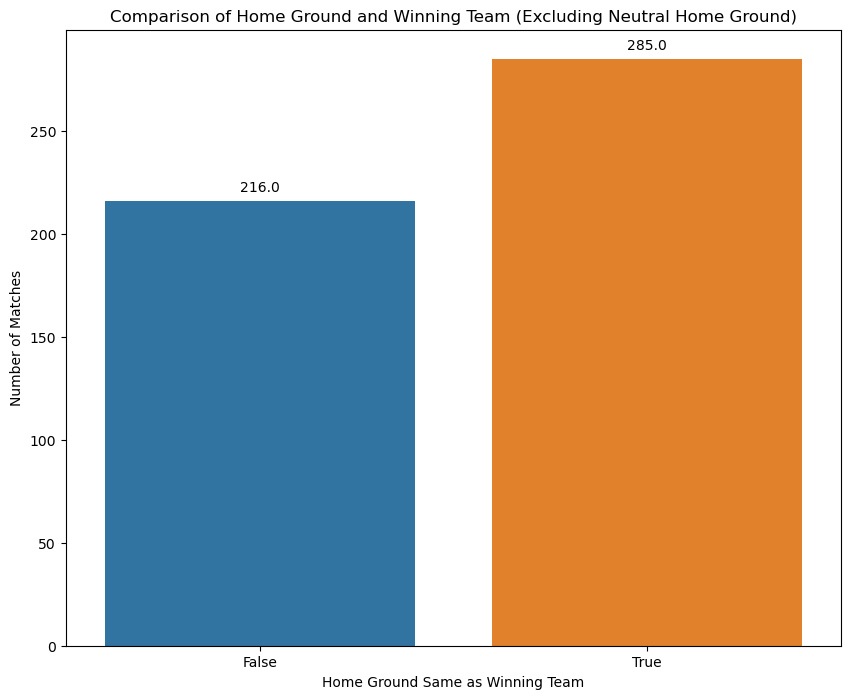

In [59]:
plt.figure(figsize=(10, 8))
filtered_data = File1[File1['HomeGround'] != 'Neutral']
home_ground_winner = filtered_data['HomeGround'] == filtered_data['Result']
ax = sns.countplot(x=home_ground_winner)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Home Ground Same as Winning Team')
plt.ylabel('Number of Matches')
plt.title('Comparison of Home Ground and Winning Team (Excluding Neutral Home Ground)')
plt.show()


**Head to Head Comparisions**

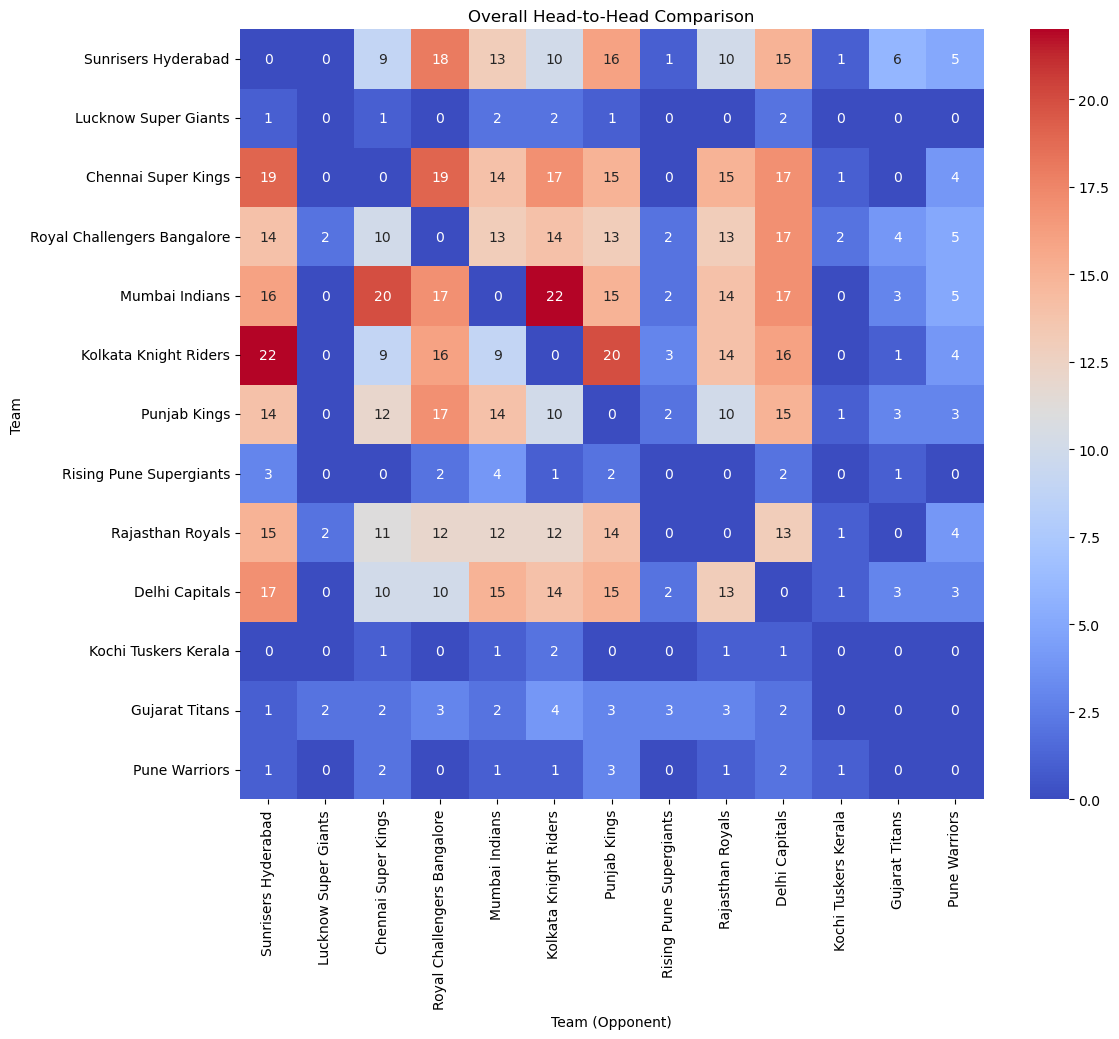

In [60]:
teams = set(File1['Team1']).union(set(File1['Team2']))
teams = list(teams)

head_to_head_matrix = pd.DataFrame(index=teams, columns=teams).fillna(0)

for index, row in File1.iterrows():
    team1 = row['Team1']
    team2 = row['Team2']
    winner = row['WinningTeam']
    
    if winner == team1:
        head_to_head_matrix.loc[team1, team2] += 1
    elif winner == team2:
        head_to_head_matrix.loc[team2, team1] += 1

plt.figure(figsize=(12, 10))
sns.heatmap(head_to_head_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Team (Opponent)')
plt.ylabel('Team')
plt.title('Overall Head-to-Head Comparison')
plt.show()

**Final Dataset**

In [61]:
# Creating a file with complete data with all required values for modeling
File1.drop(['Date'],axis=1,inplace=True)
File1.to_csv("IPL_Final_Data.csv",index=0)

In [62]:
File1.drop(['ID','Season'],axis=1,inplace=True)

### Label Encoding

In [63]:
# Label Encoding
label_encoder = LabelEncoder()
encode_columns = ['Team1','Team2','City','TossWinner','TossDecision','MatchNumber','WinningTeam','BattingFirst','BowlingFirst','Result','WinningTeam','HomeGround']
for column in encode_columns:
                  File1[column] = label_encoder.fit_transform(File1[column])
File1

,Team1,Team2,City,MatchNumber,TossWinner,TossDecision,WinningTeam,Team1BattingAverage,Team2BattingAverage,Team1BowlingAverage,...,TossWinnner,Result,WinningPercentage_x,WinningPercentage_y,HomeGround,Team1Wins,Team2Wins,Matches,Team1WinPercent,Team2WinPercent
0,9,2,1,2,9,0,2,29.621849,22.978344,27.158012,...,Team1,1,50.24,57.14,2,1,4,5,0.2,0.8
1,9,2,21,4,2,1,2,29.621849,22.978344,27.158012,...,Team2,1,50.24,57.14,0,1,4,5,0.2,0.8
2,11,9,1,4,9,1,9,26.329041,29.621849,29.144176,...,Team2,1,49.79,50.24,0,15,12,30,0.5,0.4
3,11,9,16,3,9,1,9,25.868199,28.214160,30.849869,...,Team2,1,49.79,50.24,2,15,12,30,0.5,0.4
4,11,9,26,1,11,0,11,24.927102,24.859487,30.025793,...,Team1,0,49.79,50.24,0,15,12,30,0.5,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,4,3,21,3,4,1,3,23.502175,23.269267,28.648479,...,Team1,1,51.05,51.12,1,0,1,1,0.0,1.0
942,3,0,20,3,3,1,3,26.632244,25.336094,34.440686,...,Team1,0,51.12,58.96,0,1,1,2,0.5,0.5
943,6,3,22,3,3,1,3,27.693297,24.768754,33.913220,...,Team2,1,56.68,51.12,1,0,1,1,0.0,1.0
944,7,3,22,3,3,0,7,22.791006,27.440231,30.918852,...,Team2,0,26.66,51.12,0,1,0,1,1.0,0.0


### Train - Test Split

In [64]:
X = File1[['Team1','Team2','City','TossWinner','TossDecision','HomeGround','MatchNumber','BattingFirst','BowlingFirst','Team1BattingAverage', 'Team2BattingAverage', 'Team1BowlingAverage', 'Team2BowlingAverage', 'Team1StrikeRate', 'Team2StrikeRate', 'Team1EconomyRate', 'Team2EconomyRate', 'WinningPercentage_x', 'WinningPercentage_y','Team1WinPercent','Team2WinPercent']]  # Features (all columns except the target)
y = File1['Result']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

### Model Building

In [65]:
#model = LogisticRegression(random_state=15)
#model = SVC(kernel='rbf',probability=True,C=1)
#model = RandomForestClassifier()
model = SVC(kernel='linear', C=1,probability=True)
#model = XGBClassifier()
#model = GaussianNB()
#model = KNeighborsClassifier(n_neighbors=15)

### Model Fitting

In [66]:
model.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

### Prediction

In [67]:
predictions = model.predict(X_test)

### Model Evaluation

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{matrix}")


Accuracy: 0.6842105263157895
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        96
           1       0.68      0.68      0.68        94

    accuracy                           0.68       190
   macro avg       0.68      0.68      0.68       190
weighted avg       0.68      0.68      0.68       190

Confusion Matrix:
[[66 30]
 [30 64]]


### Store Model

In [69]:
import pickle
pickle.dump(model,open('pipe1.pkl','wb'))